# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. 
В распоряжении имеются исторические данные: технические характеристики, комплектации и цены автомобилей. 

Нужно построить модель для определения стоимости, а заказчику важны:
- качество предсказания;
- скорость предсказания;
- время обучения.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#VehicleType" data-toc-modified-id="VehicleType-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span><code>VehicleType</code></a></span></li><li><span><a href="#Gearbox" data-toc-modified-id="Gearbox-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span><code>Gearbox</code></a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span><code>Model</code></a></span></li><li><span><a href="#FuelType" data-toc-modified-id="FuelType-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span><code>FuelType</code></a></span></li><li><span><a href="#NotRepaired" data-toc-modified-id="NotRepaired-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span><code>NotRepaired</code></a></span></li></ul></li><li><span><a href="#Аномальные-значения-в-некоторых-колонках" data-toc-modified-id="Аномальные-значения-в-некоторых-колонках-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Аномальные значения в некоторых колонках</a></span><ul class="toc-item"><li><span><a href="#В-колонке-с-ценой" data-toc-modified-id="В-колонке-с-ценой-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>В колонке с ценой</a></span></li><li><span><a href="#В-колонке-с-датой-регистрации" data-toc-modified-id="В-колонке-с-датой-регистрации-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>В колонке с датой регистрации</a></span></li><li><span><a href="#В-колонке-с-мощностью-двигателя" data-toc-modified-id="В-колонке-с-мощностью-двигателя-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>В колонке с мощностью двигателя</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForest-Regressor" data-toc-modified-id="RandomForest-Regressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RandomForest Regressor</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>XGBRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import time
from datetime import datetime
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# from catboost import CatBoostRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# import lightgbm
from lightgbm import LGBMRegressor
# import optuna.integration.lightgbm as lgb

from xgboost import XGBRegressor

Путь к файлу:

`/datasets/autos.csv`

**Признаки**  
`DateCrawled` — дата скачивания анкеты из базы  
`VehicleType` — тип автомобильного кузова  
`RegistrationYear` — год регистрации автомобиля  
`Gearbox` — тип коробки передач  
`Power` — мощность (л. с.)  
`Model` — модель автомобиля  
`Kilometer` — пробег (км)  
`RegistrationMonth` — месяц регистрации автомобиля  
`FuelType` — тип топлива  
`Brand` — марка автомобиля  
`NotRepaired` — была машина в ремонте или нет  
`DateCreated` — дата создания анкеты  
`NumberOfPictures` — количество фотографий автомобиля  
`PostalCode` — почтовый индекс владельца анкеты (пользователя)  
`LastSeen` — дата последней активности пользователя  

**Целевой признак**  
`Price` — цена (евро)  

In [3]:
df_autos = pd.read_csv("/datasets/autos.csv")

Посмотрим на первые строки датафрейма, а дальше выведем больше информации с помощью метода .info()

In [4]:
df_autos.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Т.к. в данных присутствуют пропуски в колонках: `VehicleType`, `Gearbox`, `Model`, `FuelType`, `NotRepaired` их следует обработать (заполнить/удалить) прежде чем приступать к построению и обучению моделей.  
Для начала проверим если есть явные дубликаты.

In [6]:
df_autos.duplicated().sum()

4

Найдено 4 дубликата, удалим и сохраним измененния.

In [7]:
df_autos.drop_duplicates(inplace=True)

### Обработка пропусков

Прежде чем заполнить пропуски, удалим те колонки, которые маловероятно влияют на стоимость автомобилей.  
К таким колонкам можно отнести: `DateCrawled`, `RegistrationMonth`, `DateCreated`, `PostalCode`, `LastSeen`, `NumberOfPictures`

In [8]:
df_autos.drop([
    'DateCrawled',
    'RegistrationMonth',
    'DateCreated',
    'PostalCode',
    'LastSeen',
    'NumberOfPictures'], axis=1, inplace=True)

Теперь можно приступить к обработке пропусков, посмотрим сколько пропусков и в каких колонках имеется.

In [9]:
df_autos.isna().sum()

Price                   0
VehicleType         37490
RegistrationYear        0
Gearbox             19833
Power                   0
Model               19705
Kilometer               0
FuelType            32895
Brand                   0
NotRepaired         71154
dtype: int64

In [10]:
df_autos.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


#### `VehicleType`

In [11]:
df_autos['VehicleType'].value_counts(dropna=False)

sedan          91457
small          79830
wagon          65165
NaN            37490
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: VehicleType, dtype: int64

Среди вариантов кузова автомобилей, есть значение `other`, по этому как минимум пропуски можно заполнить этим значением.

Посмотрим, всегда ли совпадают марка и модель с типом кузова на примере `Volkswagen golf` 

In [12]:
df_autos.query("Brand == 'volkswagen' & Model == 'golf'").head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
9,999,small,1998,manual,101,golf,150000,NaN,volkswagen,NaN
32,245,sedan,1994,NaN,0,golf,150000,petrol,volkswagen,no
35,350,NaN,2016,manual,75,golf,150000,petrol,volkswagen,no
48,7750,NaN,2017,manual,80,golf,100000,petrol,volkswagen,NaN
58,1000,sedan,1998,manual,101,golf,150000,petrol,volkswagen,no
74,6600,sedan,2006,manual,105,golf,150000,gasoline,volkswagen,no
77,800,NaN,2000,manual,90,golf,150000,gasoline,volkswagen,NaN
111,0,NaN,2017,manual,0,golf,5000,petrol,volkswagen,NaN


Как видим, одна и та же марка и модель авто может иметь разный тип кузова, по этому заполним все пропуски значением `other`

In [13]:
df_autos['VehicleType'] = df_autos['VehicleType'].fillna('other')

In [14]:
df_autos['VehicleType'].value_counts()

sedan          91457
small          79830
wagon          65165
other          40778
bus            28775
convertible    20203
coupe          16161
suv            11996
Name: VehicleType, dtype: int64

#### `Gearbox`

In [15]:
df_autos['Gearbox'].value_counts(dropna=False)

manual    268249
auto       66283
NaN        19833
Name: Gearbox, dtype: int64

In [16]:
df_autos['Gearbox'] = df_autos['Gearbox'].fillna('unknown')

#### `Model`

In [17]:
df_autos['Model'].value_counts(dropna=False)

golf                  29232
other                 24420
3er                   19761
NaN                   19705
polo                  13066
                      ...  
i3                        8
serie_3                   4
rangerover                4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 251, dtype: int64

In [18]:
df_autos['Model'] = df_autos['Model'].fillna('unknown')

#### `FuelType`

In [19]:
df_autos['FuelType'].value_counts(dropna=False)

petrol      216349
gasoline     98719
NaN          32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

В этой колонке так же присутствует значение `other`, заполним им остальные пропуски.

In [20]:
df_autos['FuelType'] = df_autos['FuelType'].fillna('other')

#### `NotRepaired`

In [21]:
df_autos['NotRepaired'].value_counts(dropna=False)

no     247158
NaN     71154
yes     36053
Name: NotRepaired, dtype: int64

Пропущенные (не указанные) значения для этой колонки можно объяснить тем, что продавец имеет ввиду отсутствие ремонта, т.е., значение `no` будет уместно.

In [22]:
df_autos['NotRepaired'] = df_autos['NotRepaired'].fillna('no')

Проверим если остались какие либо пропуски в данных

In [23]:
df_autos.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
NotRepaired         0
dtype: int64

---

### Аномальные значения в некоторых колонках

Напишем кастомизированную функцию `whiskers_limits` для описательной статистики и подсчета максимального и минимального значения усов для диаграммы размаха. Подсчитаем количество элементов после максимального значения и вычислим процент от общего числа записей.

In [24]:
def whiskers_limits(data, series):
    q1 = np.nanpercentile(series, 25)  # Q1
    q2 = np.nanpercentile(series, 50)  # Q2(Median)
    q3 = np.nanpercentile(series, 75)  # Q3
    
    whisker_maximum = round(q3 + ((q3 - q1) * 1.5), 2) # “maximum”: Q3 + 1.5 * IQR 
    whisker_minimum = round(q1 - ((q3 - q1) * 1.5), 2) # “minimum”: Q1 - 1.5 * IQR
    above_whisker_maximum = data.query('@series > @whisker_maximum')[series.name].count()
    below_whisker_minimum = data.query('@series < @whisker_minimum')[series.name].count()
    total_amount = data[series.name].count()
    
    print(f"Статистика по среднему, максимуму и минимуму, квартилям, "
          f"стандартному отклонению для: {series.name} \n---\n"
          f"mean - {round(np.mean(series), 6)}\n"
          f"std - {round(np.std(series), 6)}\n"
          f"min - {round(np.min(series), 6)}\n"
          f"max - {round(np.max(series), 6)}\n---\n"
          f"25% (Q1) - {round(q1, 6)}\n"
          f"50% (Q2) - {round(q2, 6)}\n"
          f"75% (Q3) - {round(q3, 6)}\n---\n"
          f"{whisker_minimum} - Минимальное значение для левого 'уса'\n"
          f"{whisker_maximum} - Максимальное значение для правого 'уса',\n"
          f"{below_whisker_minimum} (или {round(below_whisker_minimum / total_amount * 100, 2)}%) "
          f"из {total_amount} - N элементов после левого 'уса'\n"
          f"{above_whisker_maximum} (или {round(above_whisker_maximum / total_amount * 100, 2)}%) "
          f"из {total_amount} - N элементов после правого 'уса'")

#### В колонке с ценой

In [25]:
whiskers_limits(df_autos, df_autos['Price'])

Статистика по среднему, максимуму и минимуму, квартилям, стандартному отклонению для: Price 
---
mean - 4416.67983
std - 4514.16998
min - 0
max - 20000
---
25% (Q1) - 1050.0
50% (Q2) - 2700.0
75% (Q3) - 6400.0
---
-6975.0 - Минимальное значение для левого 'уса'
14425.0 - Максимальное значение для правого 'уса',
0 (или 0.0%) из 354365 - N элементов после левого 'уса'
18979 (или 5.36%) из 354365 - N элементов после правого 'уса'


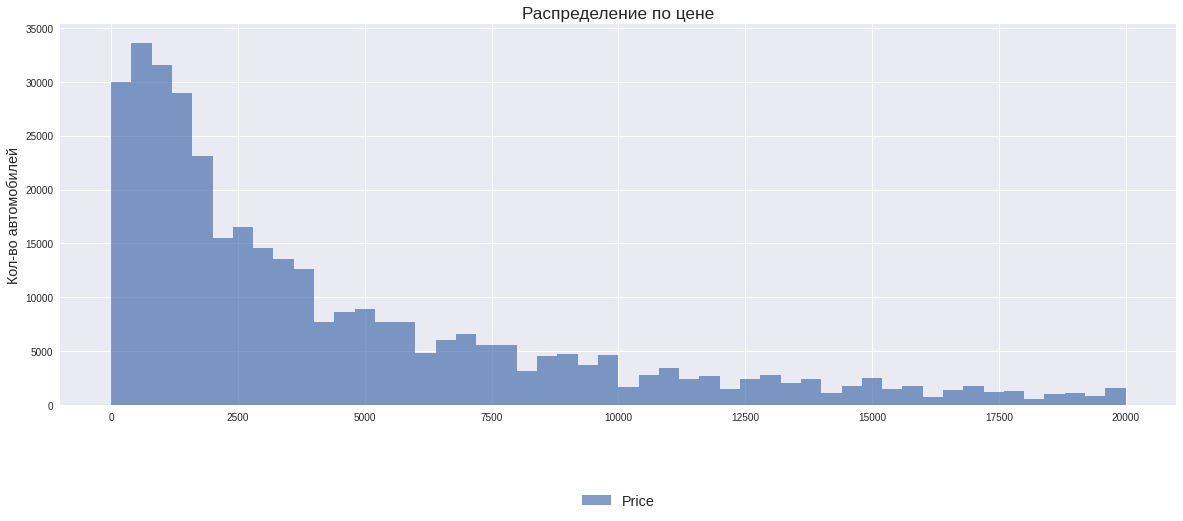

In [26]:
df_autos.hist('Price',
              bins=50,
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
plt.ylabel('Кол-во автомобилей', fontsize="x-large")
plt.title('Распределение по цене', fontsize="xx-large")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="x-large")
plt.show()

Некоторые авто стоят 0, а есть и очень дорогие до 20 тысяч евро. Хотя по квартилям можно заметить разброс цен от ~ 1000 до 6500, а максимальное значение правого уса ~14500. Отбросим аномальные значения и укажем диапазон от 100 до 14500 евро.

In [27]:
df_autos = df_autos.query('100 <= Price <= 14500')

#### В колонке с датой регистрации

In [28]:
whiskers_limits(df_autos, df_autos['RegistrationYear'])

Статистика по среднему, максимуму и минимуму, квартилям, стандартному отклонению для: RegistrationYear 
---
mean - 2003.62662
std - 68.073367
min - 1000
max - 9999
---
25% (Q1) - 1999.0
50% (Q2) - 2003.0
75% (Q3) - 2007.0
---
1987.0 - Минимальное значение для левого 'уса'
2019.0 - Максимальное значение для правого 'уса',
5398 (или 1.67%) из 323231 - N элементов после левого 'уса'
67 (или 0.02%) из 323231 - N элементов после правого 'уса'


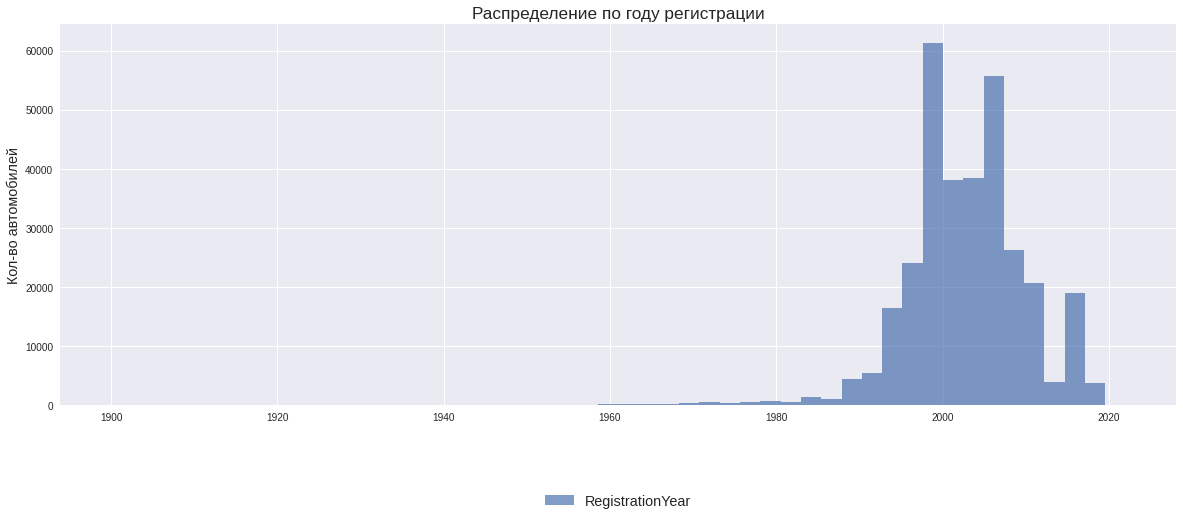

In [29]:
df_autos.hist('RegistrationYear',
              bins = 50,
              range = (1900, 2022),
              figsize =(20,7),
              legend = True,
              alpha = 0.7,
             )
plt.ylabel('Кол-во автомобилей', fontsize="x-large")
plt.title('Распределение по году регистрации', fontsize="xx-large")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="x-large")
plt.show()

Первые авто появились в 1885, ограничим лимит на хотя бы от 1960 до 2021, максимального значения правого уса.

In [30]:
df_autos = df_autos.query('1960 <= RegistrationYear <= 2021')

#### В колонке с мощностью двигателя

In [31]:
whiskers_limits(df_autos, df_autos['Power'])

Статистика по среднему, максимуму и минимуму, квартилям, стандартному отклонению для: Power 
---
mean - 107.691856
std - 189.690304
min - 0
max - 20000
---
25% (Q1) - 69.0
50% (Q2) - 102.0
75% (Q3) - 140.0
---
-37.5 - Минимальное значение для левого 'уса'
246.5 - Максимальное значение для правого 'уса',
0 (или 0.0%) из 322917 - N элементов после левого 'уса'
5701 (или 1.77%) из 322917 - N элементов после правого 'уса'


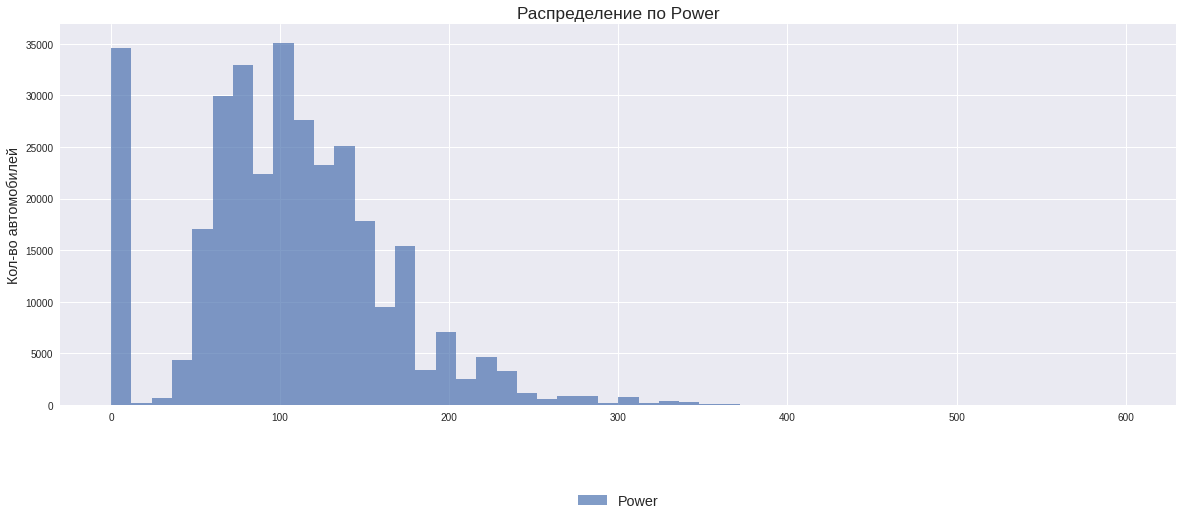

In [32]:
df_autos.hist('Power',
              bins=50,
              range = (0,600),
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
plt.ylabel('Кол-во автомобилей', fontsize="x-large")
plt.title('Распределение по Power', fontsize="xx-large")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="x-large")
plt.show()

Удалим значения ниже 20 и выше 300

In [33]:
df_autos = df_autos.query('20 <= Power <= 300')

---

С помощью метода `.info()` посмотрим на данные датафрейма после всех изменений

In [34]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285915 entries, 2 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             285915 non-null  int64 
 1   VehicleType       285915 non-null  object
 2   RegistrationYear  285915 non-null  int64 
 3   Gearbox           285915 non-null  object
 4   Power             285915 non-null  int64 
 5   Model             285915 non-null  object
 6   Kilometer         285915 non-null  int64 
 7   FuelType          285915 non-null  object
 8   Brand             285915 non-null  object
 9   NotRepaired       285915 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.0+ MB


## Обучение моделей

Создадим дубликат датафрейма для использования с `LightGBM` моделью

In [35]:
df_autos_4igbm = df_autos

### Кодирование категориальных признаков  

С использованием `LabelEncoder` закодируем колонку `Model`, остальные с обходом дамми-ловушки `One-Hot Encoding`.

In [36]:
encoder = LabelEncoder()
encoder.fit(df_autos['Model'])
df_autos['Model'] = encoder.transform(df_autos['Model'])

df_autos = pd.get_dummies(df_autos, drop_first=True)

# display(df_autos.head())

df_autos.reset_index(drop=True)
# df_autos.info()

,Price,RegistrationYear,Power,Model,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,Gearbox_manual,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_chrysler,Brand_citroen,Brand_dacia,Brand_daewoo,Brand_daihatsu,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,Brand_jaguar,Brand_jeep,Brand_kia,Brand_lada,Brand_lancia,Brand_land_rover,Brand_mazda,Brand_mercedes_benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opel,Brand_peugeot,Brand_porsche,Brand_renault,Brand_rover,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
0,9800,2004,163,117,125000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1500,2001,75,116,150000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3600,2008,69,101,90000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,650,1995,102,11,150000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2200,2004,109,8,150000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285910,5250,2016,150,4,150000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
285911,3200,2004,225,140,150000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
285912,1199,2000,101,106,125000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
285913,9200,1996,102,223,150000,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


---

### Масштабирование признаков

In [37]:
features = df_autos.drop('Price', axis=1)
target = df_autos['Price']

features_train, features_test, target_train, target_test = train_test_split(
    features, target,  test_size = 0.25, random_state = 12345)

warnings.filterwarnings("ignore")
numeric = ['RegistrationYear', 'Power', 'Kilometer','Model']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.head())

,RegistrationYear,Power,Model,Kilometer,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,Gearbox_manual,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,FuelType_other,FuelType_petrol,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_chrysler,Brand_citroen,Brand_dacia,Brand_daewoo,Brand_daihatsu,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,Brand_jaguar,Brand_jeep,Brand_kia,Brand_lada,Brand_lancia,Brand_land_rover,Brand_mazda,Brand_mercedes_benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_opel,Brand_peugeot,Brand_porsche,Brand_renault,Brand_rover,Brand_saab,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
205007,0.296243,-0.215925,0.043578,0.558530,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
71131,1.196489,0.960955,0.126188,-2.604919,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248775,0.146202,-0.857860,-0.149178,-0.160436,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
226633,-0.754043,0.746977,1.571855,0.558530,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
308645,-0.303920,0.597192,-1.402090,0.558530,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Обучим несколько моделей, предварительно оценим результаты, по итогам подбора параметров.

In [38]:
def rmse(target, predict):
    return (mean_squared_error(target, predict)) ** 0.5

custom_scorer = make_scorer(rmse, greater_is_better=False)

> Т.к. подсчет некоторых параметров занимает много времени, то результат таких вычислений я вынес отдельно под каждым блоком кода, а внутри блоков уже прописаны оптимальные параметры.

### LinearRegression

In [39]:
%%time
LR_model = LinearRegression()
RMSE = pd.Series(cross_val_score(
    LR_model, features_train, target_train, scoring=custom_scorer, cv=3)).max()
print(f"RMSE: {abs(RMSE)}\n")

RMSE: 2196.9094940280543

CPU times: user 4.26 s, sys: 2 s, total: 6.26 s
Wall time: 6.21 s


> `RMSE:` 2196.9094940280543  
`CPU times:` user 4.37 s, sys: 2.14 s, total: 6.51 s  
`Wall time:` 6.47 s

---

### RandomForest Regressor

In [40]:
%%time
RFR_model = RandomForestRegressor(random_state=12345, criterion='mse')
# parameters = {'n_estimators': range(30, 81, 10), 'max_depth': range(1,12)}
# подставлю готовые параметры, т.к. расчт занимает много времени.
parameters = {'n_estimators': [40], 'max_depth': [50]}
grid = GridSearchCV(RFR_model, parameters, scoring=custom_scorer, cv=3)
grid.fit(features_train, target_train)

print(f"Оптимальные параметры модели: {grid.best_params_}")
print(f"RMSE: {abs(grid.best_score_)}\n")

Оптимальные параметры модели: {'max_depth': 50, 'n_estimators': 40}
RMSE: 1356.342489457477

CPU times: user 2min 43s, sys: 1.3 s, total: 2min 44s
Wall time: 2min 45s


> `Оптимальные параметры модели:` {'max_depth': 50, 'n_estimators': 40}  
`RMSE:` 1356.342489457477  
`CPU times:` user 2min 46s, sys: 1.21 s, total: 2min 47s  
`Wall time:` 2min 47s

---

### XGBoost

In [41]:
%%time
XGBR_model = XGBRegressor(random_state=12345)
# подставлю готовые параметры, т.к. расчт занимает много времени.
parameters = {'n_estimators': [25], 'max_depth': [12]}
grid = GridSearchCV(XGBR_model, parameters, scoring=custom_scorer, cv=3)
grid.fit(features_train, target_train)

print(f"Оптимальные параметры модели: {grid.best_params_}")
print(f"RMSE: {abs(grid.best_score_)}\n")

Оптимальные параметры модели: {'max_depth': 12, 'n_estimators': 25}
RMSE: 1328.0119305057453

CPU times: user 3min 18s, sys: 780 ms, total: 3min 19s
Wall time: 3min 21s


> `Оптимальные параметры модели:` {'max_depth': 12, 'n_estimators': 25}  
`RMSE:` 1328.0119305057453  
`CPU times:` user 7min 43s, sys: 2.68 s, total: 7min 46s  
`Wall time:` 7min 49s

---

### LightGBM

Поменяем тип данных на категориальный в следующих стобцах

In [42]:
for col in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']:
    df_autos_4igbm[col] = df_autos_4igbm[col].astype('category')

In [43]:
features_igbm = df_autos_4igbm.drop('Price', axis=1)
target_igbm = df_autos_4igbm['Price']

features_train_igbm, features_test_igbm, target_train_igbm, target_test_igbm = train_test_split(
    features_igbm, target_igbm,  test_size = 0.25, random_state = 12345)

In [44]:
%%time
LGBMR_model = LGBMRegressor(random_state=12345)   
# params = {
#     'n_estimators' : [100, 200, 500],
#     'max_depth' : range(2, 7),
#     'num_leaves': [20, 30, 40],
#     'learning_rate': [0.03, 0.1, 0.5]
# } # Fitting 5 folds for each of 135 candidates, totalling 675 fits
# подставлю готовые параметры, т.к. расчт занимает много времени.
params = {'learning_rate': [0.1], 'max_depth': [6], 'n_estimators': [500], 'num_leaves': [40]}
grid = GridSearchCV(LGBMR_model, params,cv=5, verbose=5, scoring=custom_scorer)
grid.fit(features_train_igbm, target_train_igbm)

print(f"Оптимальные параметры модели: {grid.best_params_}")
print(f"RMSE: {abs(grid.best_score_)}\n")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=500, num_leaves=40; total time=  21.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=500, num_leaves=40; total time=  22.6s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=500, num_leaves=40; total time=  21.7s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=500, num_leaves=40; total time=  20.8s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=500, num_leaves=40; total time=  21.2s
Оптимальные параметры модели: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'num_leaves': 40}
RMSE: 1297.2416948417645

CPU times: user 2min 17s, sys: 669 ms, total: 2min 17s
Wall time: 2min 19s


Fitting 5 folds for each of 1 candidates, totalling 5 fits

> `Оптимальные параметры модели:` {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'num_leaves': 40}  
`RMSE:` 1297.2416948417645  
`CPU times:` user 12min 47s, sys: 4.21 s, total: 12min 51s  
`Wall time:` 12min 57s

---

Итоги подбора оптимальных параметров, результаты по времени и по метрике `RMSE`:
- LinearRegression: 
    - `2196`
    - `~6.47с`
- RandomForestRegressor: 
    - `1356`
    - `~2 мин 47с`
- XGBRegressor: 
    - `1328`
    - `~7 мин 49с`
- LightGBM: 
    - `1297`
    - `~12 мин 57с`



## Анализ моделей

Далее на полученных оптимизированных параметрах обучим эти модели и сделаем прогноз на тестовой выборке.
Также на этом этапе оценим скорость работы моделей.

In [45]:
def rmse_test(model, features_train=features_train, target_train=target_train, features_test=features_test, target_test=target_test):
    start_time = datetime.now()
    model.fit(features_train, target_train)
    end_time = datetime.now()
    time_lgbm_fit = end_time - start_time

    start_time = datetime.now()
    predicted_test = model.predict(features_test)
    end_time = datetime.now()
    time_lgbm_predict = end_time - start_time
    
    print(f"Время обучения модели: {time_lgbm_fit}")
    print(f"Время предсказания модели: {time_lgbm_predict}\n")
    return (mean_squared_error(target_test, predicted_test)) ** 0.5

### RandomForestRegressor

In [46]:
%%time
model = RandomForestRegressor(random_state=12345, max_depth=50, n_estimators=40)
print(f"RMSE = {rmse_test(model)}\n")

Время обучения модели: 0:00:55.750802
Время предсказания модели: 0:00:01.381764

RMSE = 1331.434293106327

CPU times: user 56.7 s, sys: 263 ms, total: 57 s
Wall time: 57.1 s


> `Время обучения модели:` 0:00:58.259237  
`Время предсказания модели:` 0:00:01.306650  
`RMSE` = 1331.434293106327  
`CPU times:` user 58.5 s, sys: 67.8 ms, total: 58.5 s  
`Wall time:` ~ 59.6 s

---

### XGBRegressor

In [47]:
%%time
model = XGBRegressor(random_state=12345, max_depth=12, n_estimators=25)
print(f"RMSE = {rmse_test(model)}\n")

Время обучения модели: 0:01:03.386364
Время предсказания модели: 0:00:00.260827

RMSE = 1318.4601498822767

CPU times: user 1min 3s, sys: 130 ms, total: 1min 3s
Wall time: 1min 3s


> `Время обучения модели:` 0:02:07.169478  
`Время предсказания модели:` 0:00:00.358144  
`RMSE` = 1318.4601498822767  
`CPU times:` user 2min 6s, sys: 539 ms, total: 2min 6s  
`Wall time:` ~ 2min 7s

---

### LGBMRegressor

In [48]:
%%time
model = LGBMRegressor(learning_rate=0.1, max_depth=6, n_estimators=500, num_leaves=40)
print(f"RMSE = {rmse_test(model)}\n")

Время обучения модели: 0:00:19.102871
Время предсказания модели: 0:00:02.809575

RMSE = 1341.1278930018268

CPU times: user 21.5 s, sys: 131 ms, total: 21.7 s
Wall time: 21.9 s


> `Время обучения модели:` 0:02:09.105082  
`Время предсказания модели:` 0:00:02.888418  
`RMSE` = 1341.1278930018268  
`CPU times:` user 2min 10s, sys: 837 ms, total: 2min 11s  
`Wall time:` ~ 2min 11s

---

Еще попробуем отдельно на копии датафрейма с категориалными колонками

In [49]:
def rmse_test_4LGBM(model, features_train=features_train_igbm, target_train=target_train_igbm, features_test=features_test_igbm, target_test=target_test_igbm):
    start_time = datetime.now()
    model.fit(features_train, target_train)
    end_time = datetime.now()
    time_lgbm_fit = end_time - start_time

    start_time = datetime.now()
    predicted_test = model.predict(features_test)
    end_time = datetime.now()
    time_lgbm_predict = end_time - start_time
    
    print(f"Время обучения модели: {time_lgbm_fit}")
    print(f"Время предсказания модели: {time_lgbm_predict}\n")
    return (mean_squared_error(target_test, predicted_test)) ** 0.5

In [50]:
%%time
model = LGBMRegressor(learning_rate=0.1, max_depth=6, n_estimators=500, num_leaves=40)
print(f"RMSE = {rmse_test_4LGBM(model)}\n")

Время обучения модели: 0:00:26.295875
Время предсказания модели: 0:00:05.400205

RMSE = 1309.5958563496845

CPU times: user 31 s, sys: 171 ms, total: 31.1 s
Wall time: 31.7 s


> `Время обучения модели:` 0:02:43.313087  
`Время предсказания модели:` 0:00:05.224299  
`RMSE` = 1309.5958563496845  
`CPU times:` user 2min 46s, sys: 817 ms, total: 2min 47s  
`Wall time:` 2min 48s

---

Итоги результатов аналза моделей по времени и по метрике `RMSE`:
- RandomForestRegressor: 
    > `Время обучения модели:` 0:00:58.259237  
    `Время предсказания модели:` 0:00:01.306650  
    `RMSE` = 1331.434293106327  
    `CPU times:` user 58.5 s, sys: 67.8 ms, total: 58.5 s  
    `Wall time:` ~ 59.6 s
- XGBRegressor: 
    > `Время обучения модели:` 0:02:07.169478  
    `Время предсказания модели:` 0:00:00.358144  
    `RMSE` = 1318.4601498822767  
    `CPU times:` user 2min 6s, sys: 539 ms, total: 2min 6s  
    `Wall time:` ~ 2min 7s
- LightGBM `|` (LightGBM на копии): 
    > `Время обучения модели:` 0:02:09.105082 `|` (0:02:43.313087)  
    `Время предсказания модели:` 0:00:02.888418 `|` (0:00:05.224299)  
    `RMSE` = 1341.1278930018268 `|` (1309.5958563496845)  
    `CPU times:` user 2min 10s, sys: 837 ms, total: 2min 11s `|` (user 2min 46s, sys: 817 ms, total: 2min 47s)  
    `Wall time:` ~ 2min 11s `|` (2min 48s)



## Общий вывод

За время работы над проектом были заполнены пропуски, обработаны аномальные выбросы и были оценены различные модели с позиции скорости их обучения и точности предсказаний стоимости автомобиля

Эксперименты показывают, что модели могут требовать много времени на подборку оптимальных параметров, а резульаты вычислений на обучающей и тестовой выборке могут отличаться, как по качеству так и по скорости исполнения.

❕По скорости вычислений `RandomForestRegressor` справилась быстрее за **~1 минуту**, т.к. для остальных потребовалось более двух минут.
Точность `RMSE` выше у `XGBRegressor` модели **1318**, но у `LightGBM` на копии датафрейма с категориалными колонками `RMSE` составляет **1309** но дольше всех заняло времени.